## Imports

In [22]:
# Download Needed Packages
import sys
!{sys.executable} -m pip install -q pandas
!{sys.executable} -m pip install -q nltk
!{sys.executable} -m pip install -q sklearn
!{sys.executable} -m pip install -q wordcloud==1.8.1
!{sys.executable} -m pip install -q keras

In [23]:
# Import needed libraries and download needed data
import string
import pandas as pd
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
nltk.download('punkt', quiet=True)
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

## Data Exploration

In [24]:
# Import Data
df = pd.read_csv("./fake_job_postings.csv")
print(f'{df.shape[0]} observations, {df.shape[1]} features')
display(df.head(5))

17880 observations, 18 features


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [25]:
# Print count of NaNs and type of each column
print("Column\t\t    NaNs   Type")
for column in df.columns:
    print(f'{column.ljust(20)}{str(df[column].isna().sum()).ljust(7)}{df[column].dtype}')

Column		    NaNs   Type
job_id              0      int64
title               0      object
location            346    object
department          11547  object
salary_range        15012  object
company_profile     3308   object
description         1      object
requirements        2695   object
benefits            7210   object
telecommuting       0      int64
has_company_logo    0      int64
has_questions       0      int64
employment_type     3471   object
required_experience 7050   object
required_education  8105   object
industry            4903   object
function            6455   object
fraudulent          0      int64


In [26]:
#Replacing NAN Values
NAN_Cols=[
    "location","department","salary_range",
    "company_profile","description","requirements",
    "benefits","employment_type","required_experience",
    "required_experience","required_education","industry","function"
]
print("Column\t\t       NaNs")
for i in NAN_Cols:
    df[i].fillna("",inplace=True)
print(df.isnull().sum())

Column		       NaNs
job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


In [27]:
# Get numeric columns unique values
numeric_atts = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
for column in numeric_atts:
    print(f'{column}: {df[column].unique()}')

job_id: [    1     2     3 ... 17878 17879 17880]
telecommuting: [0 1]
has_company_logo: [1 0]
has_questions: [0 1]
fraudulent: [0 1]


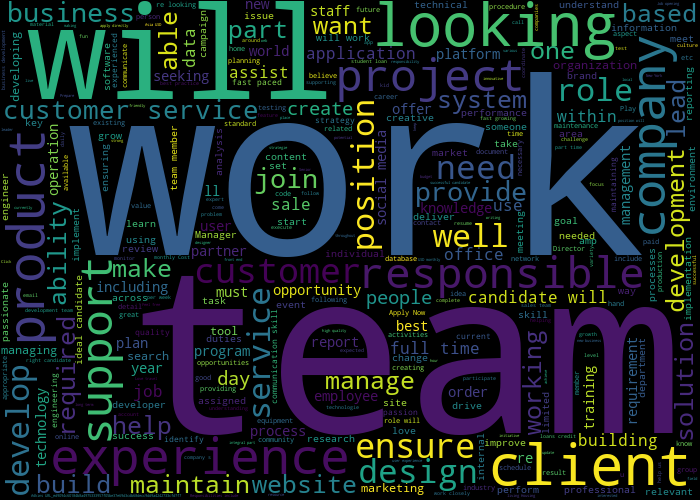

In [28]:
#Data Visualization
#top 300 most used words in the description
long_string = ','.join(list(df['description'].values))
wordcloud = WordCloud(background_color="black", max_words=500, width=700, height=500, contour_width=10, contour_color='green')
wordcloud.generate(long_string)
wordcloud.to_image()

## Preprocessing

In [29]:
# Convert Everything to lowercase
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
display(df.head(5))

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketing intern,"us, ny, new york",marketing,,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,,0,1,0,other,internship,,,marketing,0
1,2,customer service - cloud video production,"nz, , auckland",success,,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,0,1,0,full-time,not applicable,,marketing and advertising,customer service,0
2,3,commissioning machinery assistant (cma),"us, ia, wever",,,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,account executive - washington dc,"us, dc, washington",sales,,our passion for improving quality of life thro...,the company: esri – environmental systems rese...,"education: bachelor’s or master’s in gis, busi...",our culture is anything but corporate—we have ...,0,1,0,full-time,mid-senior level,bachelor's degree,computer software,sales,0
4,5,bill review manager,"us, fl, fort worth",,,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,0,1,1,full-time,mid-senior level,bachelor's degree,hospital & health care,health care provider,0


In [30]:
# Remove Punctuation
punc_list = list(string.punctuation)
def remove_punctuation(text, punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text

df = df.applymap(lambda s: remove_punctuation(s, punc_list) if type(s) == str else s)
display(df.head(5))

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketing intern,us ny new york,marketing,,we re food52 and we ve created a groundbreaki...,food52 a fast growing james beard award winn...,experience with content management systems a m...,,0,1,0,other,internship,,,marketing,0
1,2,customer service cloud video production,nz auckland,success,,90 seconds the worlds cloud video production ...,organised focused vibrant awesome do you...,what we expect from you your key responsibilit...,what you will get from usthrough being part of...,0,1,0,full time,not applicable,,marketing and advertising,customer service,0
2,3,commissioning machinery assistant cma,us ia wever,,,valor services provides workforce solutions th...,our client located in houston is actively se...,implement pre commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,account executive washington dc,us dc washington,sales,,our passion for improving quality of life thro...,the company esri – environmental systems rese...,education bachelor’s or master’s in gis busi...,our culture is anything but corporate—we have ...,0,1,0,full time,mid senior level,bachelor s degree,computer software,sales,0
4,5,bill review manager,us fl fort worth,,,spotsource solutions llc is a global human cap...,job title itemization review managerlocation ...,qualifications rn license in the state of texa...,full benefits offered,0,1,1,full time,mid senior level,bachelor s degree,hospital health care,health care provider,0


In [31]:
# Tokenize each text column
for column in df.columns:
    df[column] = df[column].apply(lambda s: word_tokenize(s) if type(s) == str else s)
display(df.head(5))

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,"[marketing, intern]","[us, ny, new, york]",[marketing],[],"[we, re, food52, and, we, ve, created, a, grou...","[food52, a, fast, growing, james, beard, award...","[experience, with, content, management, system...",[],0,1,0,[other],[internship],[],[],[marketing],0
1,2,"[customer, service, cloud, video, production]","[nz, auckland]",[success],[],"[90, seconds, the, worlds, cloud, video, produ...","[organised, focused, vibrant, awesome, do, you...","[what, we, expect, from, you, your, key, respo...","[what, you, will, get, from, usthrough, being,...",0,1,0,"[full, time]","[not, applicable]",[],"[marketing, and, advertising]","[customer, service]",0
2,3,"[commissioning, machinery, assistant, cma]","[us, ia, wever]",[],[],"[valor, services, provides, workforce, solutio...","[our, client, located, in, houston, is, active...","[implement, pre, commissioning, and, commissio...",[],0,1,0,[],[],[],[],[],0
3,4,"[account, executive, washington, dc]","[us, dc, washington]",[sales],[],"[our, passion, for, improving, quality, of, li...","[the, company, esri, –, environmental, systems...","[education, bachelor, ’, s, or, master, ’, s, ...","[our, culture, is, anything, but, corporate—we...",0,1,0,"[full, time]","[mid, senior, level]","[bachelor, s, degree]","[computer, software]",[sales],0
4,5,"[bill, review, manager]","[us, fl, fort, worth]",[],[],"[spotsource, solutions, llc, is, a, global, hu...","[job, title, itemization, review, managerlocat...","[qualifications, rn, license, in, the, state, ...","[full, benefits, offered]",0,1,1,"[full, time]","[mid, senior, level]","[bachelor, s, degree]","[hospital, health, care]","[health, care, provider]",0


In [32]:
# Get descriptive columns and stopwords
descriptive_atts = ['company_profile', 'description', 'requirements', 'benefits']
stop_words = stopwords.words('english')

# Function to remove stopwords from an array of strings
def remove_stopwords(arr, remove):
    filtered = []
    for word in arr:
        if word not in remove:
            filtered.append(word)
    return filtered

# Remove common stopwords from strings in descriptive columns
for column in descriptive_atts:
    df[column] = df[column].apply(lambda s: remove_stopwords(s, stop_words) if type(s) == list else s)
display(df.head(5))

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,"[marketing, intern]","[us, ny, new, york]",[marketing],[],"[food52, created, groundbreaking, award, winni...","[food52, fast, growing, james, beard, award, w...","[experience, content, management, systems, maj...",[],0,1,0,[other],[internship],[],[],[marketing],0
1,2,"[customer, service, cloud, video, production]","[nz, auckland]",[success],[],"[90, seconds, worlds, cloud, video, production...","[organised, focused, vibrant, awesome, passion...","[expect, key, responsibility, communicate, cli...","[get, usthrough, part, 90, seconds, team, gain...",0,1,0,"[full, time]","[not, applicable]",[],"[marketing, and, advertising]","[customer, service]",0
2,3,"[commissioning, machinery, assistant, cma]","[us, ia, wever]",[],[],"[valor, services, provides, workforce, solutio...","[client, located, houston, actively, seeking, ...","[implement, pre, commissioning, commissioning,...",[],0,1,0,[],[],[],[],[],0
3,4,"[account, executive, washington, dc]","[us, dc, washington]",[sales],[],"[passion, improving, quality, life, geography,...","[company, esri, –, environmental, systems, res...","[education, bachelor, ’, master, ’, gis, busin...","[culture, anything, corporate—we, collaborativ...",0,1,0,"[full, time]","[mid, senior, level]","[bachelor, s, degree]","[computer, software]",[sales],0
4,5,"[bill, review, manager]","[us, fl, fort, worth]",[],[],"[spotsource, solutions, llc, global, human, ca...","[job, title, itemization, review, managerlocat...","[qualifications, rn, license, state, texasdipl...","[full, benefits, offered]",0,1,1,"[full, time]","[mid, senior, level]","[bachelor, s, degree]","[hospital, health, care]","[health, care, provider]",0


## Model Training

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import pad_sequences
from sklearn.metrics import accuracy_score

In [39]:
# Model that uses only the description column as X data
# Adds value to the word. Encoding the words to a numerical value
des_tokenizer = Tokenizer()
des_tokenizer.fit_on_texts(df['description'])
X = des_tokenizer.texts_to_sequences(df['description'])
X = pad_sequences(X, maxlen=500)
print(f'Rows of X: {len(X)}')
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=21)

model = Sequential()

model.add(Dense(units=50,activation="tanh",input_dim=500))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

model.fit(X_train, y_train, batch_size=5, epochs=5)


Rows of X: 17880
Epoch 1/5
2861/2861 [==============================] - 3s 790us/step - loss: 0.2079
Epoch 2/5
2861/2861 [==============================] - 2s 756us/step - loss: 0.2053
Epoch 3/5
2861/2861 [==============================] - 2s 747us/step - loss: 0.1979
Epoch 4/5
2861/2861 [==============================] - 2s 755us/step - loss: 0.1998
Epoch 5/5
2861/2861 [==============================] - 2s 750us/step - loss: 0.2010


In [43]:
# Threshold Results and Evaluate
# On Training Set
yTrain_hat=[1 if y>=0.5 else 0 for y in model.predict(X_train)]
print("Description Training: ")
print(classification_report(y_train,yTrain_hat))
print("Accuracy: ",accuracy_score(y_train,yTrain_hat))

# On Testing Set
y_hat=[1 if y>=0.5 else 0 for y in model.predict(X_test)]
print("Description Testing: ")
print(classification_report(y_test,y_hat))
print("Accuracy: ",accuracy_score(y_test,y_hat))

447/447 [==============================] - 0s 635us/step
Description Training: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     13590
           1       0.96      0.06      0.12       714

    accuracy                           0.95     14304
   macro avg       0.96      0.53      0.55     14304
weighted avg       0.95      0.95      0.93     14304

Accuracy:  0.9530900447427293
112/112 [==============================] - 0s 667us/step
Description Testing: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3424
           1       0.78      0.05      0.09       152

    accuracy                           0.96      3576
   macro avg       0.87      0.52      0.53      3576
weighted avg       0.95      0.96      0.94      3576

Accuracy:  0.9588926174496645


In [36]:
# Model that uses only the company_profile column as X data
prof_tokenizer = Tokenizer()
prof_tokenizer.fit_on_texts(df['company_profile'])
prof_X = prof_tokenizer.texts_to_sequences(df['company_profile'])
prof_X = pad_sequences(X, maxlen=500)
y = df['fraudulent']
prof_X_train, prof_X_test, prof_y_train, prof_y_test = train_test_split(prof_X, y,test_size=0.2, random_state=21)

model = Sequential()

model.add(Dense(units=50,activation="tanh",input_dim=500))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

model.fit(prof_X_train, prof_y_train, batch_size=5, epochs=5)

Epoch 1/5
2861/2861 [==============================] - 2s 751us/step - loss: 0.2072
Epoch 2/5
2861/2861 [==============================] - 2s 756us/step - loss: 0.2040
Epoch 3/5
2861/2861 [==============================] - 2s 762us/step - loss: 0.2004
Epoch 4/5
2861/2861 [==============================] - 2s 755us/step - loss: 0.1966
Epoch 5/5
2861/2861 [==============================] - 2s 766us/step - loss: 0.1963


In [37]:
# Threshold Results and Evaluate
# On Training Set
prof_yTrain_hat=[1 if y>=0.5 else 0 for y in model.predict(prof_X_train)]
print("Company Profile Training: ")
print(classification_report(prof_y_train,prof_yTrain_hat))
print("Accuracy: ",accuracy_score(prof_y_train,prof_yTrain_hat))

# On Testing Set
prof_y_hat=[1 if y>=0.5 else 0 for y in model.predict(prof_X_test)]
print("\nCompany Profile Test: ")
print(classification_report(prof_y_test,prof_y_hat))
print("Accuracy: ",accuracy_score(prof_y_test,prof_y_hat))

447/447 [==============================] - 0s 617us/step
Company Profile Training: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     13590
           1       0.81      0.04      0.08       714

    accuracy                           0.95     14304
   macro avg       0.88      0.52      0.53     14304
weighted avg       0.94      0.95      0.93     14304

Accuracy:  0.9516219239373602
112/112 [==============================] - 0s 622us/step

Company Profile Test: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3424
           1       0.71      0.03      0.06       152

    accuracy                           0.96      3576
   macro avg       0.84      0.52      0.52      3576
weighted avg       0.95      0.96      0.94      3576

Accuracy:  0.9583333333333334
